In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The project intro

This project represents data preprocessing, analysis and visualization for the dataset from the Kaggle website:
https://www.kaggle.com/datasets/muhammadawaistayyab/amazon-movies-and-films.  

Analysis should answer the following questions:
1. What is the number of movies: in the total, by release year, by MPAA rating?
2. What is the average movie rating: in the total, by release year, by MPAA rating?
3. What is the average price: in the total, by release year, by movie rating, by MPAA rating?
4. Is there a correlation of price with movie rating and number of ratings?
5. What can be advised based on the results of the analysis,

# Data preprocessing

Data preprocessing generally includes the following components:
- data overview
- removing duplicates and irrelevant data
- handling missing values
- handling inconsistent formats 
- handling outliers

The exact steps and algorithm for data preprocessing depend on the specific dataset. 
So we'll start with a data overview, analyze the findings, and prepare the dataset for analysis, aiming to cover all the above components.

### Data overview

In [12]:
data = pd.read_csv("amazon_movies.csv") # the CSV file is located in a directory on the local computer accessible to Jupyter Notebook
data

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN
3,3,Kelce,5.0,570,Prime Video,2023.0,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN
...,...,...,...,...,...,...,...,...,...,...
2103,2112,Nelly & Nadine,4.8,30,Prime Video,2023.0,NaN,Magnus Gertten,"Nelly Mousset-Vos,Nadine Hwang,Anne Bianchi",2.99
2104,2113,Lethal Legacy,5.0,2,Prime Video,2023.0,NaN,Joe Carroll,"Brittany Inge,Nathan Owens,James Black,Dorian ...",NaN
2105,2114,Moana (Bonus Content),4.8,26335,Prime Video,2016.0,PG,"Ron Clements,John Musker","Auli'i Cravalho,Dwayne Johnson,Rachel House",9.99
2106,2115,Honey Boy,4.4,1338,Prime Video,2019.0,R,Alma Har’el,"Shia LaBeouf,Lucas Hedges,Noah Jupe,FKA twigs",NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2108 non-null   int64  
 1   title          2108 non-null   object 
 2   Movie_Rating   2108 non-null   float64
 3   No_of_Ratings  2108 non-null   int64  
 4   Format         2108 non-null   object 
 5   ReleaseYear    2069 non-null   float64
 6   MPAA_Rating    1378 non-null   object 
 7   Directed_By    2043 non-null   object 
 8   Starring       2107 non-null   object 
 9   Price          1011 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 164.8+ KB


Based on the overview, we see the following issues with the dataset:
- the column "Unnamed: 0" is irrelevant
- column naming is inconsistent (both snake case and camel case, names in capitalized format and lowercase)
- data type for the "ReleaseYear" column is float, but must be an integer
- non-null count for some columns is less than 2108 (total number of entries), which means they have NaN values

We'll address these issues below.


### Removing the irrelevant column

In [14]:
data.drop("Unnamed: 0", axis=1, inplace=True)
# "axis=1" means we perform an operation along columns, but not rows: in our case we drop the column "Unnamed: 0"
# "inplace=True" means we directly update the dataset
data.head(5)

,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN
3,Kelce,5.0,570,Prime Video,2023.0,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN


### Renaming columns to a consistent format

In [15]:
data.rename(columns={"title": "Title", "No_of_Ratings": "No_Of_Ratings", "ReleaseYear": "Release_Year"}, inplace=True)
data.head(2)

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99


### Converting the 'Release_Year' column to an integer format

In [16]:
data["Release_Year"] = pd.to_numeric(data["Release_Year"], errors="ignore").astype("Int64")
# "errors='ignore'" means values that can't be converted remain as they are (in our case, there can be NaN values)
# "astype("Int64")" means values are converted to an integer type 
data.head(5)

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
0,Totally Killer,4.3,323,Prime Video,2023,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN
1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,A Million Miles Away,4.9,1126,Prime Video,2023,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN
3,Kelce,5.0,570,Prime Video,2023,NaN,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN
4,Despicable Me 3,4.8,31813,Prime Video,2017,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN


### Removing duplicate entries

Removing duplicates can be tricky because:
- if we simply remove entries where entire row is duplicated, it can be insufficient (e.g. we can remain entries where some columns differ, but entries are duplicated)
- if we remove duplicates looking at movie titles only, we can delete items that shouldn't be deleted (e.g. there can be different movies with the same title).

Therefore, we'll begin by removing entries where the entire row is duplicated (as we are certain they are duplicates) and then proceed accordingly.

#### Removing entries where entire row is duplicated

In [17]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1890 non-null   object 
 1   Movie_Rating   1890 non-null   float64
 2   No_Of_Ratings  1890 non-null   int64  
 3   Format         1890 non-null   object 
 4   Release_Year   1853 non-null   Int64  
 5   MPAA_Rating    1234 non-null   object 
 6   Directed_By    1829 non-null   object 
 7   Starring       1889 non-null   object 
 8   Price          927 non-null    float64
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 149.5+ KB


After removing duplicate rows, there are 1890 entries remaining out of the initial 2108.

#### Inspecting duplicate movie titles

In [18]:
title_counts = data['Title'].value_counts()
duplicates = title_counts[title_counts > 1]
duplicates_count = len(duplicates)
print(duplicates)
print(f"Number of movies presented in the dataset more than once: {duplicates_count}")

Tim Burton's Corpse Bride           2
Nerve                               2
Hot Tub Time Machine 2              2
Moonraker                           2
The Man with the Golden Gun         2
Scooby-Doo 2: Monsters Unleashed    2
Puss in Boots                       2
Scream                              2
The Addams Family                   2
Interstellar                        2
Legally Blonde                      2
Tomorrow Never Dies                 2
Halloween II                        2
Saw II                              2
From Russia with Love               2
Godzilla vs. Kong                   2
The Firm                            2
Goldeneye                           2
The Gift                            2
The Gambler                         2
Name: Title, dtype: int64
Number of movies presented in the dataset more than once: 20


Since we have only 20 movies with duplicate titles, we'll inspect all of them to be sure.

In [19]:
duplicate_titles = data[data['Title'].isin(title_counts[title_counts > 1].index)].sort_values(by="Title")
duplicate_titles

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
1029,From Russia with Love,4.7,2764,Prime Video,1964,PG,Terence Young,"Sean Connery,Daniela Bianchi,Robert Shaw,Lotte...",3.89
568,From Russia with Love,4.7,2764,Prime Video,1964,PG,Terence Young,"Sean Connery,Daniela Bianchi,Pedro Armendáriz",NaN
65,Godzilla vs. Kong,4.6,40533,Prime Video,2021,PG-13,Adam Wingard,"Alexander Skarsgård,Millie Bobby Brown,Rebecca...",3.99
694,Godzilla vs. Kong,4.6,40533,Prime Video,2021,PG-13,Adam Wingard,"Alexander Skarsgård,Millie Bobby Brown,Rebecca...",NaN
1086,Goldeneye,4.6,3746,Prime Video,1995,PG-13,Martin Campbell,"Pierce Brosnan,Sean Bean,Izabella Scorupco",3.89
574,Goldeneye,4.6,3746,Prime Video,1995,PG-13,Martin Campbell,"Pierce Brosnan,Sean Bean,Izabella Scorupco",NaN
717,Halloween II,4.7,12733,Prime Video,1981,NaN,Rick Rosenthal,"Jamie Lee Curtis,Donald Pleasence",3.99
1672,Halloween II,4.6,5405,Prime Video,1981,R,Rob Zombie,"Scout Taylor-Compton,Tyler Mane,Malcolm McDowell",3.99
1234,Hot Tub Time Machine 2,4.2,6849,Prime Video,2015,R,Steve Pink,"Rob Cordry,Craig Robinson,Clark Duke,Adam Scott",4.29
316,Hot Tub Time Machine 2,4.2,6849,Prime Video,2015,R,Steve Pink,"Rob Corddry,Craig Robinson",NaN


In most cases, movies are indeed duplicated: they have the same rating, year, MPAA rating, director and actors, and the only difference is in the "Price" column (the first entry has a price while the second one has NaN value).  
So we can delete entries with NaN prices for such movies.  
Indexes of rows for deletion are: 568, 694, 574, 316, 333, 142, 1931, 458, 1317, 1992, 752, 1142.  
To simplify the analysis, let's remove these entries from the dataset, retaining only duplicate titles that require deeper analysis.

In [20]:
data = data.drop(index=[568, 694, 574, 316, 333, 142, 1931, 458, 1317, 1992, 752, 1142])
title_counts = data['Title'].value_counts()
duplicate_titles = data[data['Title'].isin(title_counts[title_counts > 1].index)].sort_values(by="Title")
duplicate_titles

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
717,Halloween II,4.7,12733,Prime Video,1981,NaN,Rick Rosenthal,"Jamie Lee Curtis,Donald Pleasence",3.99
1672,Halloween II,4.6,5405,Prime Video,1981,R,Rob Zombie,"Scout Taylor-Compton,Tyler Mane,Malcolm McDowell",3.99
148,Puss in Boots,4.8,4079,Prime Video,2011,PG,Chris Miller,"Antonio Banderas,Salma Hayek,Zach Galifianakis",NaN
619,Puss in Boots,4.7,4109,Prime Video,2011,PG,Chris Miller,"Antonio Banderas,Salma Hayek,Zach Galifianakis",3.79
129,Saw II,4.5,3163,Prime Video,2005,R,Darren Lynn Bousman,"Donnie Wahlberg,Tobin Bell,Shawnee Smith,Frank...",3.99
1866,Saw II,4.5,1451,Prime Video,2005,R,Darren Lynn Bousman,"Tobin Bell,Noam Jenkins,Shawnee Smith,Donnie W...",NaN
243,Scream,4.4,32182,Prime Video,2022,R,"Matt Bettinelli-Olpin,Tyler Gillett","Neve Campbell,Courteney Cox,David Arquette",3.29
1136,Scream,4.4,32182,Prime Video,1996,NaN,Wes Craven,"Neve Campbell,David Arquette,Courteney Cox Arq...",3.79
43,The Addams Family,4.6,43712,Prime Video,2019,PG,Conrad Vernon,"Oscar Isaac,Charlize Theron,Chloë Grace Moretz",NaN
357,The Addams Family,4.7,14173,Prime Video,1991,PG-13,Barry Sonnenfeld,"Raul Julia,Anjelica Huston,Christopher Lloyd",2.89


There are 8 movie titles remaining. We'll need to analyze them using the https://www.amazon.com/ website.

##### Halloween II

Halloween II refers to two different movies:
- Rick Rosenthal's Halloween II (1981): [link to amazon website](https://www.amazon.com/Halloween-II-Jamie-Lee-Curtis/dp/B0044WQHYI)
- Rob Zombie's Halloween II (2009): [link to amazon website](https://www.amazon.com/gp/video/detail/B0CCT2DJ9K/ref=atv_dp_amz_c_TS8274d9_1_10?jic=16%7CCgNhbGwSA2FsbA%3D%3D)

According to the information from the Amazon website, the release year for Rob Zombie's Halloween II is 2009, not 1981.  
Therefore, we should remain both records in the dataset, but update the release year:

In [21]:
data.at[1672, "Release_Year"] = 2009
data.loc[[1672]] # to check if the value has changed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
1672,Halloween II,4.6,5405,Prime Video,2009,R,Rob Zombie,"Scout Taylor-Compton,Tyler Mane,Malcolm McDowell",3.99


Another observation is that the 1981 movie has "NaN" MPAA rating in the dataset, while it has the "18+" tag on the Amazon website. For the purposes of this project, it is impracticable to obtain ratings for all NaN values. Furthermore, ratings like "16+" or "18+" don't apply to common rating systems, so we don't know whether they can be converted to "R" or "NC-17".  
While we won't directly modify the dataset based on real-time web scraping, it is advisable to consider recommending a uniform rating classification across all movies, where applicable. This can enhance consistency and facilitate a standardized approach to movie ratings in the dataset.

##### Puss in Boots

Both items relate to the same movie in the different video formats:
- X-ray format (rent price - USD 3.79): [link to amazon website](https://www.amazon.com/Puss-Boots-Chris-Miller/dp/B079HRPPPB/ref=sr_1_2?crid=2LI6J90QELWP4&keywords=puss+in+boots&qid=1703782987&s=instant-video&sprefix=Puss+in+Boots%2Cinstant-video%2C183&sr=1-2)  
- HDR, UHD format (rent price - USD 3.99): [link to amazon website](https://www.amazon.com/Puss-Boots-Antonio-Banderas/dp/B0CP3HJXNM/ref=sr_1_3?crid=2LI6J90QELWP4&keywords=puss+in+boots&qid=1703782987&s=instant-video&sprefix=Puss+in+Boots%2Cinstant-video%2C183&sr=1-3)  

Depending on the analysis's purpose, such items can be represented either as a single entry (given that they are the same movie) or as two separate entries (considering they represent distinct products or items for sale). Our analysis leans more towards a business perspective, so we choose to keep them as two separate items. Nonetheless, there is room for improvement in managing the database; it would be more appropriate to have a parameter like 'Format' and store information in a separate column.  

The code below replaces 'NaN' with the actual price for the item with the index 148:

In [22]:
data.at[148, "Price"] = 3.99
data.loc[[148]] # to check if the value has changed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
148,Puss in Boots,4.8,4079,Prime Video,2011,PG,Chris Miller,"Antonio Banderas,Salma Hayek,Zach Galifianakis",3.99


##### Saw II

Both items relate to the rated and unrated versions of the same movie:  
- Saw II (rated): [link to amazon website](https://www.amazon.com/Saw-II-Donnie-Wahlberg/dp/B002WG26ES/ref=sr_1_1?crid=2B5WADXXPO65Z&keywords=Saw+II&qid=1703784047&s=instant-video&sprefix=saw+ii%2Cinstant-video%2C331&sr=1-1)  
- Saw II (unrated):  [link to amazon website](https://www.amazon.com/Saw-2-Unrated-Beverley-Mitchell/dp/B00OPDFEUY/ref=sr_1_2?crid=2B5WADXXPO65Z&keywords=Saw+II&qid=1703784047&s=instant-video&sprefix=saw+ii%2Cinstant-video%2C331&sr=1-2)  

"Unrated" refers to a version of the film that has not received a rating from a film classification board, such as the Motion Picture Association of America (MPAA). When a movie is released in theaters or on home media, it typically undergoes a rating process to determine the appropriate age group for which it is suitable.  

Based on considerations above, we choose to keep them as two separate items.

The code below replaces 'NaN' with the actual price for the item with the index 1866:

In [23]:
data.at[1866, "Price"] = 3.99
data.loc[[1866]] # to check if the value has changed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
1866,Saw II,4.5,1451,Prime Video,2005,R,Darren Lynn Bousman,"Tobin Bell,Noam Jenkins,Shawnee Smith,Donnie W...",3.99


##### Scream

Scream refers to two different movies:  
- Wes Craven's "Scream" (1996): [link to amazon website](https://www.amazon.com/Scream-David-Arquette/dp/B00AYB1BIK/ref=sr_1_3?crid=3CI2AP1X0XNPK&keywords=Scream&qid=1703839366&s=instant-video&sprefix=scream%2Cinstant-video%2C184&sr=1-3)  
- Matt Bettinelli-Olpin's "Scream" (2022): [link to amazon website](https://www.amazon.com/Scream-Melissa-Barrera/dp/B09QXMW6ZR/ref=sr_1_1?crid=3CI2AP1X0XNPK&keywords=Scream&qid=1703839366&s=instant-video&sprefix=scream%2Cinstant-video%2C184&sr=1-1)  

Both movies have identical number of reviews (32182) in the dataset and on the website. While this may occur, we are currently unable to delve deeper into our analysis to confirm. However, having the option to validate this point would be useful.  

Another observations is that the 1996 movie has "NaN" MPAA rating in the dataset, while it has the the "R" rating on the Amazon website. In this case, the rating was not parsed from the database when preparing the dataset.  
The code below replaces 'NaN' with the actual MPAA rating for the 1996 movie (the index 1136):


In [24]:
data.at[1136, "MPAA_Rating"] = "R"
data.loc[[1136]] # to check if the value has changed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
1136,Scream,4.4,32182,Prime Video,1996,R,Wes Craven,"Neve Campbell,David Arquette,Courteney Cox Arq...",3.79


##### The Addams Family

The Addams Family refers to two different movies:  

- The 1991 film "The Addams Family": [link to amazon website](https://www.amazon.com/Addams-Family-Christopher-Lloyd/dp/B0035LJY6C/ref=sr_1_4?crid=3RD886H9CQ242&keywords=The+Addams+Family&qid=1703842326&s=instant-video&sprefix=the+addams+family%2Cinstant-video%2C283&sr=1-4)  
- The 2019 cartoon "The Addams Family": [link to amazon website](https://www.amazon.com/Addams-Family-Chlo%C3%AB-Grace-Moretz/dp/B07YX5FW54/ref=sr_1_3?crid=3RD886H9CQ242&keywords=The+Addams+Family&qid=1703842326&s=instant-video&sprefix=the+addams+family%2Cinstant-video%2C283&sr=1-3)  

So they should be kept as separate entries in the dataset.  

The actual price of the 1991 film as of the analysis date (29 Dec 2023) is different from the price as of the dataset preparation (USD 3.99 and USD 2.89, respectively). Therefore, we are unsure whether we can apply the actual price to the 2019 cartoon. For safety, we keep the price as "NaN".

##### The Firm

Both items relate to the same movie in the different video formats:
- The Firm, X-RAY: [link to amazon website](https://www.amazon.com/Firm-Tom-Cruise/dp/B0B6GPDYV7/ref=sr_1_5?crid=MC3DOLXTQSGE&keywords=the+firm&qid=1703842613&s=instant-video&sprefix=The+firm%2Cinstant-video%2C196&sr=1-5)  
- The Firm, UHD: [link to amazon website](https://www.amazon.com/Firm-4K-UHD-Tom-Cruise/dp/B088C3BQG6/ref=sr_1_3?crid=MC3DOLXTQSGE&keywords=the+firm&qid=1703842613&s=instant-video&sprefix=The+firm%2Cinstant-video%2C196&sr=1-3)  

Based on considerations above, we choose to keep them as two separate items.

##### The Gambler

There are 2 movies with the name "The Gambler" on the Amazon website:  
- Rupert Wyatt's "The Gambler" (2014): [link to amazon website](https://www.amazon.com/Gambler-Brie-Larson/dp/B0BZC5986H/ref=sr_1_1?crid=278JBBNXI648H&keywords=The+Gambler&qid=1703843003&s=instant-video&sprefix=the+gambler%2Cinstant-video%2C175&sr=1-1)  
- Dick Lowry's "The Gambler" (1980): [link to amazon website](https://www.amazon.com/Gambler-Christine-Belford-Boxleitner-Rogers/dp/B00I8H6IHQ/ref=sr_1_2?crid=278JBBNXI648H&keywords=The+Gambler&qid=1703843003&s=instant-video&sprefix=the+gambler%2Cinstant-video%2C175&sr=1-2)  

We are unsure whether the 1980 movie was present on the Amazon website as of the date of dataset preparation. Futhermore, we can't verify the accuracy of the information at that moment. Therefore, we'll make the following changes to the dataset:  
- remove the item with the index 1179
- update the director of the 2014 movies (both Rupert Wyatt and Dick Lowry are mentioned as directors now)


In [25]:
data = data.drop(index=[1179])
data.at[293, "Directed_By"] = "Rupert Wyatt"
data.loc[data.index.isin([293, 1179])] # to check if the value has changed  

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
293,The Gambler,4.1,6453,Prime Video,2014,R,Rupert Wyatt,"Brie Larson,Mark Wahlberg",NaN


##### The Gift

The Gift related to the 2001 movie: [link to amazon website](https://www.amazon.com/Gift-Cate-Blanchett/dp/B00AAMFHUQ/ref=sr_1_3?crid=24391RCQMTOVD&keywords=The+Gift&qid=1703843256&s=instant-video&sprefix=the+gift%2Cinstant-video%2C177&sr=1-3).  
According to the website, the movie rating as of the date of analysis (1 Jan 2024) is 4.5, and the number of ratings is 4210. Therefore, we will remove the item with the index 1812 (doen't have price and director, incorrect information about movie rating and reviews): 


In [26]:
data = data.drop(index=[1812])
data.loc[data.index.isin([913, 1812])] # to check if the value has changed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
913,The Gift,4.5,4200,Prime Video,2001,R,Sam Raimi,"Keanu Reeves,Cate Blanchett,Hilary Swank",3.99


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1876 non-null   object 
 1   Movie_Rating   1876 non-null   float64
 2   No_Of_Ratings  1876 non-null   int64  
 3   Format         1876 non-null   object 
 4   Release_Year   1839 non-null   Int64  
 5   MPAA_Rating    1221 non-null   object 
 6   Directed_By    1816 non-null   object 
 7   Starring       1875 non-null   object 
 8   Price          929 non-null    float64
dtypes: Int64(1), float64(2), int64(1), object(5)
memory usage: 148.4+ KB


### Handling outliers

#### Movie_Rating

In [27]:
rating_counts = data["Movie_Rating"].value_counts().reset_index()
rating_counts.columns = ["Movie_Rating", "Count"]
rating_counts = rating_counts.sort_values(by="Movie_Rating").reset_index(drop=True)
rating_counts

,Movie_Rating,Count
0,4.0,137
1,4.1,125
2,4.2,138
3,4.3,174
4,4.4,190
5,4.5,230
6,4.6,299
7,4.7,304
8,4.8,219
9,4.9,24


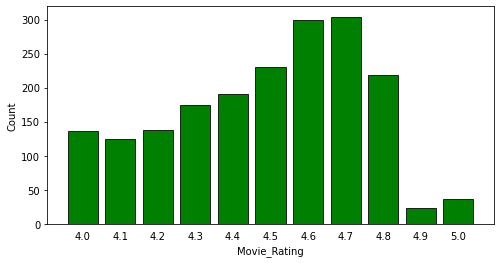

In [28]:
plt.figure(figsize=(8, 4))
x = rating_counts["Movie_Rating"].astype("str")   # converting to string allows to display x labels and bins correctly
y = rating_counts["Count"]
plt.bar(x, y, width=0.8, color="green", edgecolor="black", linewidth=0.8)  # Adjust width and linewidth
plt.tick_params(bottom=False) # Remove ticks on the x-axis
plt.xlabel("Movie_Rating")
plt.ylabel("Count")
plt.show()

All movie ratings are within 4.0 and 5.0, the number of movies with the highest rating is insignificant compared to the others.  
So we can conclude that there are no outliers in movie ratings.

#### Number of ratings

In [29]:
data["No_Of_Ratings"].describe().round(1)

count      1876.0
mean       8214.5
std       16230.1
min           1.0
25%         303.0
50%        2068.5
75%        7840.2
max      142807.0
Name: No_Of_Ratings, dtype: float64

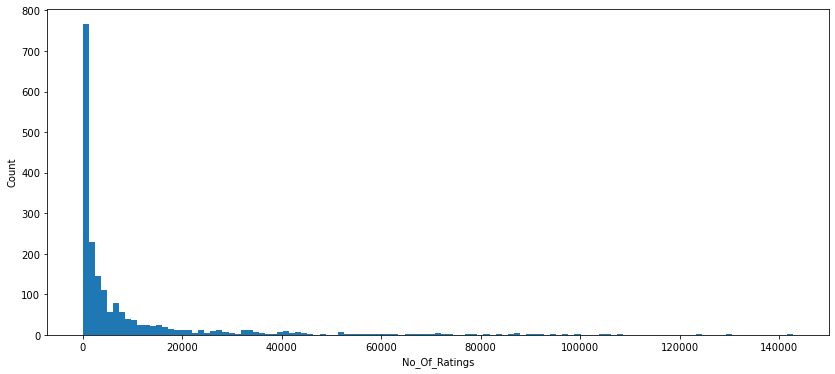

In [30]:
plt.figure(figsize=(14, 6))
plt.hist(data["No_Of_Ratings"], bins="auto")
plt.xlabel("No_Of_Ratings")
plt.ylabel("Count")
plt.show()

Number of ratings is highly distributed: from a minimum of 1 rating to a maximum of 142807 ratings per movie.  
However, movies with a low number of ratings comprise the majority of all movies. We can see this from the histogram above (almost all values are between 0 and 20000 ratings) and the statictics (75% of movies have less than 7841 ratings).  
Therefore, we will verify the number of ratings of top 5 movies to the [Amazon website](https://www.amazon.com/s?i=instant-video&crid=30DAZ4UXMVU4N&sprefix=%2Cinstant-video%2C329&ref=nb_sb_noss)

In [31]:
data[["Title", "No_Of_Ratings"]].sort_values(by="No_Of_Ratings", ascending=False).head(5)

,Title,No_Of_Ratings
35,Joker,142807
373,Sonic the Hedgehog,129546
1254,Elf,123979
746,Spider-Man: Far From Home,123576
436,Illumination Presents: Dr. Seuss' The Grinch,107996


As of the date of analysis (2 Jan 2024), 4 movies have the number of ratings that slightly exceeds the number per dataset and this is expected.  
However, the number of ratings for "Sonic the Hedgehog" is 124,942 which is less than the number per dataset - 129,546.  
Since we don't have the opportunity to perform additional investigation within this project and the order of numbers is not significantly different, we will use the dataset information for further analysis. At the same time, it should be noted that there is potential area for improvement regarding data management and dataset preparation.  
We have also ensured that outliers are not errors or irrelevant data, so we won't remove data from the analysis based on the number of ratings.

#### Format

In [32]:
data["Format"].value_counts()

Prime Video    1854
4K               13
Blu-ray           7
DVD               2
Name: Format, dtype: int64

In [33]:
data[data["Format"]!="Prime Video"]

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
347,The Super Mario Bros. Movie (Blu-Ray + DVD + D...,4.8,43543,Blu-ray,<NA>,NaN,Aaron Horvath,"Chris Pratt,Anna Taylor-Joy,Charlie Day",12.99
734,The Lord of the Rings: The Motion Picture Tril...,4.8,37902,4K,<NA>,NaN,Peter Jackson,"Elijah Wood,Ian McKellen,Liv Tyler,Viggo Morte...",76.99
1010,Spider-Man: Across The Spider-Verse - UHD/BD C...,4.8,5934,4K,<NA>,NaN,"Joaquim Dos Santos,Kemp Powers","Shameik Moore,Hailee Steinfeld,Brian Tyree Henry",21.24
1052,Batman: The Complete Animated Series [Blu-ray],4.9,8679,Blu-ray,<NA>,NaN,Various,Various,52.75
1114,Harry Potter: 8-Film Collection [4K Ultra HD +...,4.8,86512,4K,<NA>,NaN,"Chris Columbus,Alfonso Cuarón,Mike Newell,Davi...","Daniel Radcliffe,Rupert Grint,Emma Watson",95.99
1178,Barbie (Blu-Ray + Digital),4.5,1639,Blu-ray,<NA>,NaN,greta gerwig,"margot robbie,ryan gosling,will ferrell",24.96
1282,Barbie (4K Ultra HD + Digital) [4K UHD],4.5,1639,4K,<NA>,NaN,greta gerwig,"margot robbie,ryan gosling,will ferrell",29.96
1353,SOUND OF FREEDOM,4.1,61,DVD,<NA>,NaN,NaN,"Jim Caviezel,Mira Sorvino",19.96
1397,The James Bond Collection [Blu-ray],4.8,3770,Blu-ray,<NA>,NaN,Various,Various,54.99
1410,Fast X (4K Ultra HD + Blu-Ray + Digital) [4K UHD],4.4,14717,4K,<NA>,NaN,NaN,"Vin Diesel,Michelle Rodriguez,Jason Momoa",22.24


In [34]:
data["Price"].describe().round(2)

count    929.00
mean       4.89
std        6.95
min        0.89
25%        3.59
50%        3.79
75%        3.99
max      119.99
Name: Price, dtype: float64

As we can see from the analysis above, items with a format other than "Prime Video" ("4K", "Blu-ray" and "DVD") represent collections, not individual movies. They do not have release year, because different movie parts or series may have different release years. Furthermore, they have prices that significantly exceed median (USD 3.79) and 75% percentile (USD 3.99).  
Given these considerations, we will remove such items from the dataset for analysis.

In [35]:
data.drop(data[data["Format"] != "Prime Video"].index, inplace=True)
data["Format"].value_counts()

Prime Video    1854
Name: Format, dtype: int64

#### Release year

In [36]:
data["Release_Year"].describe().round(0)

count    1839.0
mean     2008.0
std        15.0
min      1931.0
25%      2002.0
50%      2013.0
75%      2019.0
max      2023.0
Name: Release_Year, dtype: float64

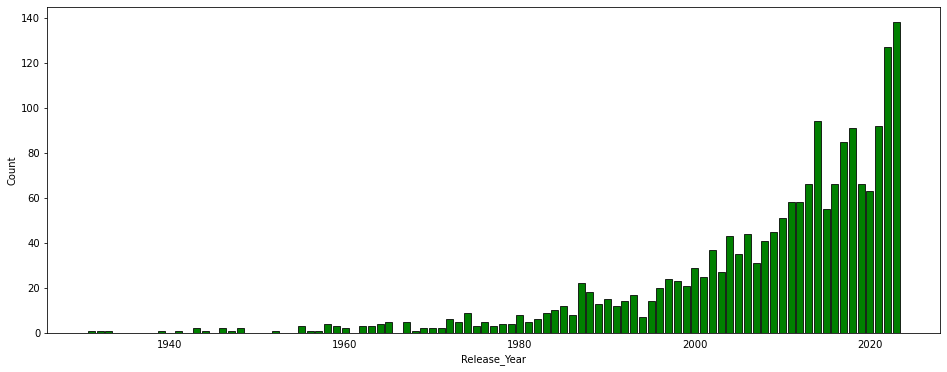

In [37]:
release_years_counts = data["Release_Year"].value_counts().reset_index()
release_years_counts.columns = ["Release_Year", "Count"]
release_years_counts = release_years_counts.sort_values(by="Release_Year").reset_index(drop=True)

plt.figure(figsize=(16, 6))
x = release_years_counts["Release_Year"]
y = release_years_counts["Count"]
plt.bar(x, y, width=0.8, color="green", edgecolor="black", linewidth=0.8)  # Adjust width and linewidth
plt.tick_params(bottom=False) # Remove ticks on the x-axis
plt.xlabel("Release_Year")
plt.ylabel("Count")
plt.show()

In [38]:
data[["Title", "Release_Year"]].sort_values(by="Release_Year", ascending=True).head(5)

,Title,Release_Year
322,Dracula,1931
493,The Mummy (1932),1932
826,The Invisible Man,1933
1703,The Wizard of Oz,1939
430,The Wolf Man (1941),1941


The dataset includes movies with a release year from 1931 to 2023, so there are no movies before the cinema era or after the year of analysis.  
The dataset is mainly represented by movies for the last 20 years: we can see this from the bar chart above and the statistics (movies for the period from 1931 to 2002 comprise only 25% of all movies).This is also in line with the expectations.  
To verify the accuracy of the information about release years, we have checked the release year of the 5 oldest movies to the [Amazon website](https://www.amazon.com/s?i=instant-video&crid=30DAZ4UXMVU4N&sprefix=%2Cinstant-video%2C329&ref=nb_sb_noss), no differences identified.  
Given these considerations, we don't remove items from the dataset based on the release year.

#### MPAA rating

In [39]:
data["MPAA_Rating"].value_counts(dropna=False)

NaN      633
R        582
PG-13    402
PG       211
G         26
Name: MPAA_Rating, dtype: int64

All ratings are in accordance with MPAA classification: R, PG-13, PG, G, Unrated.  
Allocation of movies is in line with [MPAA statistics](https://www.the-numbers.com/market/mpaa-ratings): Unrated and R-rated movies comprise the largest quantity, while G-rated movies have the smallest quantity.  
Given these considerations, we don't remove items from the dataset based on the MPPA rating.

#### Price

In [40]:
data["Price"].describe().round(2)

count    907.00
mean       4.13
std        2.50
min        0.89
25%        3.49
50%        3.79
75%        3.99
max       24.99
Name: Price, dtype: float64

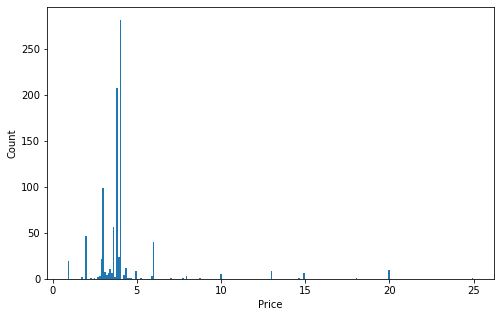

In [41]:
plt.figure(figsize=(8, 5))
plt.hist(data["Price"], bins="auto")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [42]:
data[data["Price"]>5.99]

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price
24,The Equalizer 3 - Bonus X-Ray Edition,4.5,448,Prime Video,2023,R,Antoine Fuqua,"Denzel Washington,Dakota Fanning,Eugenio Mastr...",19.99
34,Barbie,4.5,1639,Prime Video,2023,PG-13,Greta Gerwig,"Margot Robbie,Ryan Gosling,America Ferrera",24.99
103,Mission: Impossible - Dead Reckoning Part One,4.4,33,Prime Video,2023,PG-13,Christopher McQuarrie,"Tom Cruise,Hayley Atwell,Ving Rhames,Simon Pegg",19.99
117,The Nun II,4.1,115,Prime Video,2023,R,Michael Chaves,"Taissa Farmiga,Jonas Bloquet,Storm Reid",19.99
134,Indiana Jones and the Dial of Destiny (Bonus C...,4.6,6305,Prime Video,2023,PG-13,James Mangold,"Harrison Ford,Phoebe Waller-Bridge,Mads Mikkelsen",19.99
188,Blue Beetle,4.4,280,Prime Video,2023,PG-13,Angel Manuel Solo,"Xolo Maridue,Adriana Barraza,Dami Alc?zar",19.99
203,Gran Turismo: Based on a True Story - Bonus X-...,4.8,162,Prime Video,2023,PG-13,Neill Blomkamp,"David Harbour,Orlando Bloom,Archie Madekwe",14.99
223,My Big Fat Greek Wedding 3,4.0,158,Prime Video,2023,PG-13,Nia Vardalos,"Nia Vardalos,John Corbett,Louis Mandylor,Laini...",19.99
247,Suicide Squad (Extended Cut),4.7,7649,Prime Video,2016,PG-13,David Ayer,"Will Smith,Jared Leto,Margot Robbie,Joel Kinnaman",14.99
318,Monster High The Movie,4.6,300,Prime Video,2022,NaN,NaN,Todd Holland,7.99


Based on the analysis, the majority of movies have the price below USD 5 per item.  
At the same time, the price can vary and reaches a maximum of USD 24.99.  
We have also identified that prices above USD 5.99 represent purchases instead of rentals, or bonus/extended versions of movies. It can be verified on the [Amazon website](https://www.amazon.com/s?i=instant-video&crid=30DAZ4UXMVU4N&sprefix=%2Cinstant-video%2C329&ref=nb_sb_noss).   

Given these considerations, we will remove all items with the price above USD 5.99. Besides, we will remove items that have "bonus" or "extended" in their titles:

In [43]:
data.drop(data[data["Price"] > 5.99].index, inplace=True)
data.drop(data[data["Title"].str.contains("bonus|extended", case=False)].index, inplace=True)
data[data["Price"]>5.99]   # to check if values have been removed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price


In [44]:
data[data["Title"].str.contains("bonus|extended", case=False)]   # to check if values have been removed

,Title,Movie_Rating,No_Of_Ratings,Format,Release_Year,MPAA_Rating,Directed_By,Starring,Price


This completes the data preparation and cleaning stage. Now we can start analyzing and visualizing the data. 

# Data analysis and visualization

As mentioned in the project intro, the analysis should answer the following questions:

1. What is the number of movies: in the total, by release year, by movie rating, by MPAA rating?
2. What is the average movie rating: in the total, by release year, by movie rating, by MPAA rating?
3. What is the average price: in the total, by release year, by movie rating, by MPAA rating?
4. Is there a correlation of price with movie rating and number of ratings?  

Let's analyze data and answer these questions.

### Number of movies

In [45]:
print(f"The total number of movies is {len(data)}") # count the number of rows in pandas dataset

The total number of movies is 1805


In [46]:
movie_count_release_year = data.groupby("Release_Year").agg({"Title": "count"}).reset_index()
movie_count_release_year.columns = ["Release_Year", "Movie_Count"]
movie_count_release_year

,Release_Year,Movie_Count
0,1931,1
1,1932,1
2,1933,1
3,1939,1
4,1941,1
...,...,...
73,2019,66
74,2020,63
75,2021,87
76,2022,122


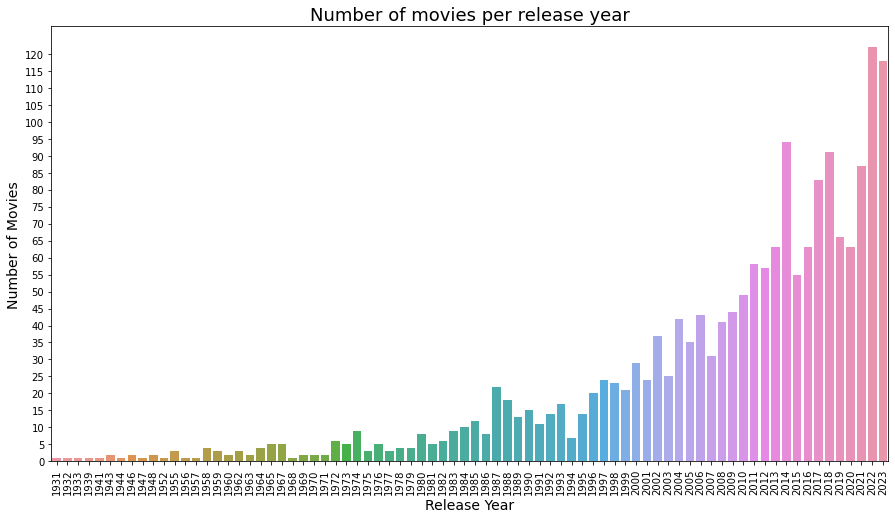

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(x=data["Release_Year"].dropna())
plt.title("Number of movies per release year", fontsize=18)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(range(0, data["Release_Year"].value_counts().max(), 5), fontsize=10)
plt.show()

In [75]:
share_after_2000 = round(len(data[data["Release_Year"]>2000]) / len(data) * 100, 1)
print(f"Movies with the release year after 2000 comprise {share_after_2000}% of all movies")

Movies with the release year after 2000 comprise 77.1% of all movies


In [48]:
movie_count_rating = data.groupby("Movie_Rating").agg({"Title": "count"}).reset_index()
movie_count_rating.columns = ["Movie_Rating", "Movie_Count"]
movie_count_rating

,Movie_Rating,Movie_Count
0,4.0,136
1,4.1,120
2,4.2,136
3,4.3,171
4,4.4,183
5,4.5,220
6,4.6,288
7,4.7,298
8,4.8,198
9,4.9,20


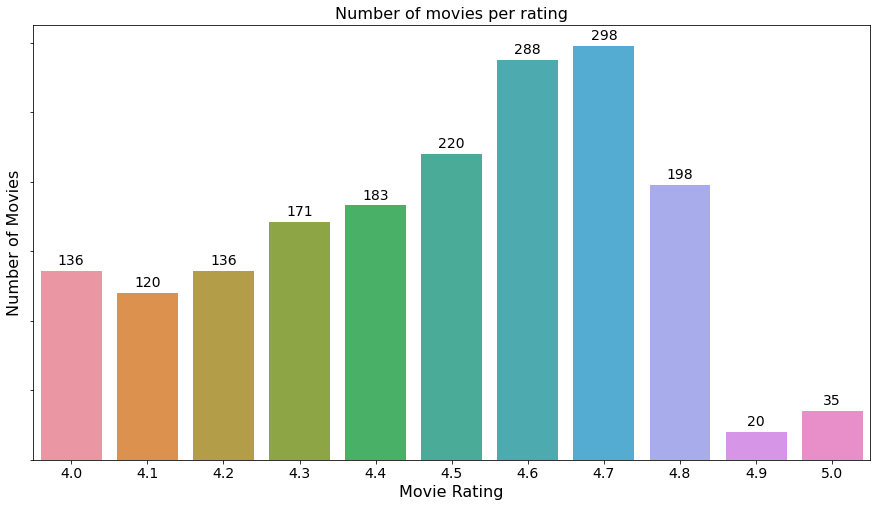

In [49]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=data["Movie_Rating"].fillna("Unrated"))
plt.title("Number of movies per rating", fontsize=16)
plt.xlabel("Movie Rating", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)
plt.xticks(fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                textcoords='offset points')
ax.yaxis.set_ticklabels([])
plt.show()

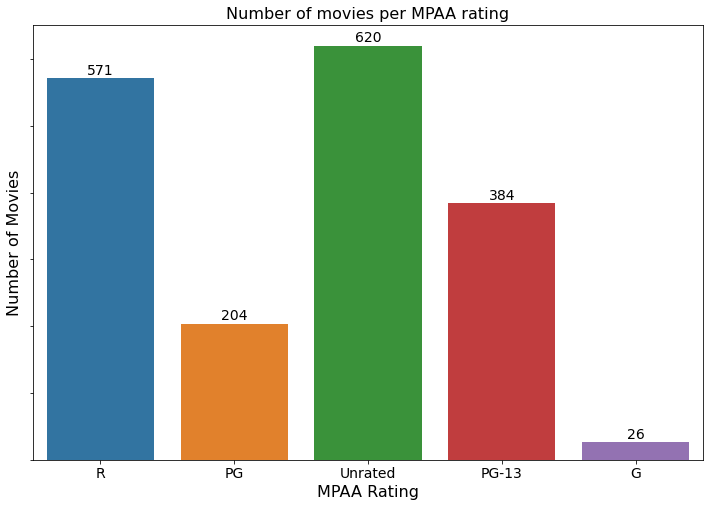

In [50]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data["MPAA_Rating"].fillna("Unrated"))
plt.title("Number of movies per MPAA rating", fontsize=16)
plt.xlabel("MPAA Rating", fontsize=16)
plt.ylabel("Number of Movies", fontsize=16)
plt.xticks(fontsize=14)
# plt.yticks(range(0, data["MPAA_Rating"].value_counts().max(), 50), fontsize=12)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=14, color="black", xytext=(0, 8),
                textcoords="offset points")
ax.yaxis.set_ticklabels([])
plt.show()

#### Number of movies - summary

- The total number of movies in the dataset (after data preprocessing) is 1805.  
- The majority of movies have the release year after 2000: their share comprise 77.1% of all movies.  
- Movie ratings are within 4.0 and 5.0. Movies with 4.6 and 4.7 number comprise the largest count (288 and 298, accordingly); movies with 4.9 and 5.0 rating comprise the smallest count (20 and 35, accordingly).
- MPAA rating: Unrated and R-rated movies have the largest count (620 and 571, accordingly); G-rated movies represent the smallest part of dataset (26 items)

### Average movie rating

In [51]:
avg_rating_total = round(data["Movie_Rating"].mean(), 2)
med_rating_total = round(data["Movie_Rating"].median(), 2)
print(f"The average movie rating: {avg_rating_total}")
print(f"The median movie rating: {med_rating_total}")

The average movie rating: 4.48
The median movie rating: 4.5


In [52]:
avg_rating_release_year = data.groupby("Release_Year").agg({"Movie_Rating":"mean", "Title":"count"}).reset_index()
avg_rating_release_year.columns = ["Release_Year", "Avg_Movie_Rating", "Movie_Count"]
avg_rating_release_year["Avg_Movie_Rating"] = avg_rating_release_year["Avg_Movie_Rating"].round(2)
avg_rating_release_year

,Release_Year,Avg_Movie_Rating,Movie_Count
0,1931,4.70,1
1,1932,4.70,1
2,1933,4.70,1
3,1939,4.80,1
4,1941,4.80,1
...,...,...,...
73,2019,4.36,66
74,2020,4.31,63
75,2021,4.33,87
76,2022,4.38,122


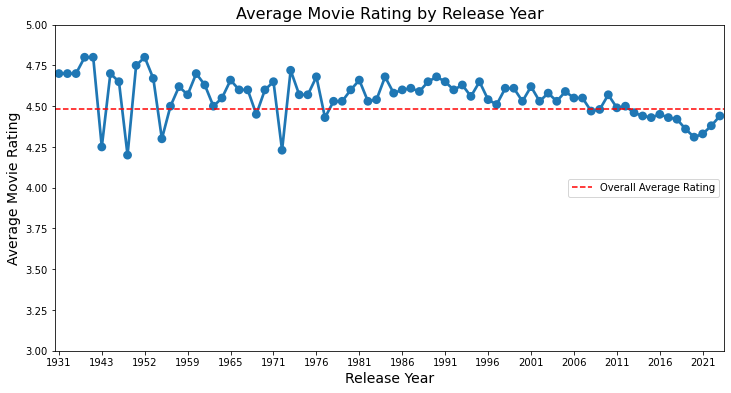

In [53]:
plt.figure(figsize=(12, 6))
sns.pointplot(x="Release_Year", y="Avg_Movie_Rating", data=avg_rating_release_year)
plt.axhline(y=data["Movie_Rating"].mean(), color="red", linestyle="--", label="Overall Average Rating")
plt.ylim(3, 5)
tick_positions = range(0, len(avg_rating_release_year), 5)
plt.xticks(tick_positions, avg_rating_release_year["Release_Year"].iloc[tick_positions])
plt.title("Average Movie Rating by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Movie Rating", fontsize=14)
plt.legend(loc="center right")
plt.show()

In [90]:
avg_rating_before_2000 = round(data[data["Release_Year"]<=2000]["Movie_Rating"].mean(), 2)
avg_rating_after_2000 = round(data[data["Release_Year"]>2000]["Movie_Rating"].mean(), 2)
print(f"Average rating for movies with the release year before 2000: {avg_rating_before_2000}")
print(f"Average rating for movies with the release year after 2000: {avg_rating_after_2000}")

Average rating for movies with the release year before 2000: 4.59
Average rating for movies with the release year after 2000: 4.45


In [54]:
avg_rating_mpaa_rating = data.groupby(data["MPAA_Rating"].fillna("Unrated")).agg({"Movie_Rating":"mean", "Title":"count"}).reset_index()
avg_rating_mpaa_rating.columns = ["MPAA_Rating", "Avg_Movie_Rating", "Movie_Count"]
avg_rating_mpaa_rating["Avg_Movie_Rating"] = avg_rating_mpaa_rating["Avg_Movie_Rating"].round(2)
avg_rating_mpaa_rating

,MPAA_Rating,Avg_Movie_Rating,Movie_Count
0,G,4.58,26
1,PG,4.62,204
2,PG-13,4.55,384
3,R,4.43,571
4,Unrated,4.43,620


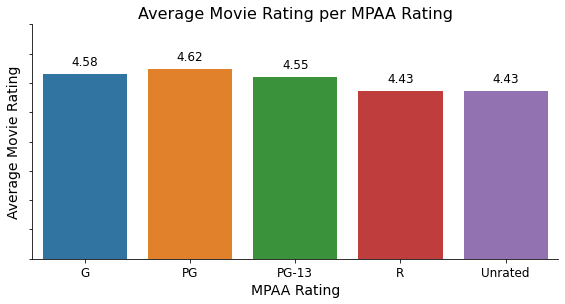

In [55]:
plot = sns.catplot(x="MPAA_Rating", y="Avg_Movie_Rating", data=avg_rating_mpaa_rating, kind="bar", height=4, aspect=2)
ax = plot.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05, f'{p.get_height():.2f}', 
            ha='center', va='bottom', fontsize=12)
plt.title("Average Movie Rating per MPAA Rating", fontsize=16)
plt.xlabel("MPAA Rating", fontsize=14)
plt.ylabel("Average Movie Rating", fontsize=14)
plt.xticks(fontsize=12)
ax.yaxis.set_ticklabels([])
plt.ylim(3, 5)
plt.show()

#### Average movie rating - summary

- Average movie rating is 4.48.
- Movies with the release year before 2000 mostly have a rating that exceeds the overall average, while movies with the release year in 2000s have a rating below the overall average (4.59 and 4.45, accordingly).
- PG-rated movies have the highest movie rating (4.62), while Unrated and R-rated movies have the lowest rating (4.43)

### Average price

In [83]:
avg_price_total = round(data["Price"].mean(), 2)
med_price_total = round(data["Price"].median(), 2)
min_price_total = round(data["Price"].min(), 2)
max_price_total = round(data["Price"].max(), 2)
print(f"The average price: {avg_price_total}")
print(f"The median price: {med_price_total}")
print(f"The minimum price: {min_price_total}")
print(f"The maximum price: {max_price_total}")

The average price: 3.66
The median price: 3.79
The minimum price: 0.89
The maximum price: 5.99


In [57]:
avg_price_release_year = data.groupby("Release_Year").agg({"Price":"mean", "Title":"count"}).reset_index()
avg_price_release_year.dropna(subset=["Price"], inplace=True)
avg_price_release_year.columns = ["Release_Year", "Avg_Price", "Movie_Count"]
avg_price_release_year["Avg_Price"] = avg_price_release_year["Avg_Price"].round(2)
avg_price_release_year

,Release_Year,Avg_Price,Movie_Count
0,1931,3.59,1
1,1932,3.99,1
2,1933,3.79,1
4,1941,3.79,1
5,1943,3.99,2
...,...,...,...
73,2019,3.46,66
74,2020,3.27,63
75,2021,3.43,87
76,2022,3.77,122


In [58]:
# Create dataset with min prices for each year
min_price_release_year = data.groupby("Release_Year").agg({"Price":"min", "Title":"count"}).reset_index()
min_price_release_year.dropna(subset=["Price"], inplace=True)
min_price_release_year.columns = ["Release_Year", "Min_Price", "Movie_Count"]
# Create dataset with max prices for each year
max_price_release_year = data.groupby("Release_Year").agg({"Price":"max", "Title":"count"}).reset_index()
max_price_release_year.dropna(subset=["Price"], inplace=True)
max_price_release_year.columns = ["Release_Year", "Max_Price", "Movie_Count"]

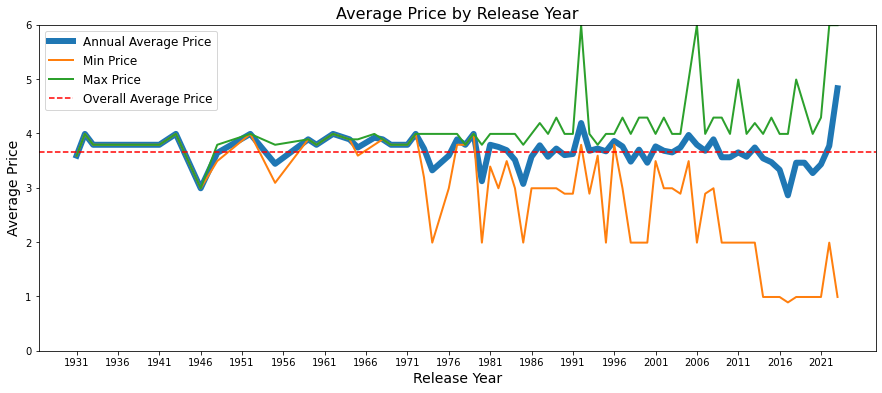

In [59]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="Release_Year", y="Avg_Price", data=avg_price_release_year, label="Annual Average Price", linewidth=6)
sns.lineplot(x="Release_Year", y="Min_Price", data=min_price_release_year, label="Min Price", linewidth=2)
sns.lineplot(x="Release_Year", y="Max_Price", data=max_price_release_year, label="Max Price", linewidth=2)
plt.axhline(y=data["Price"].mean(), color="red", linestyle="--", label="Overall Average Price")
plt.ylim(0, 6)
tick_positions = range(min(avg_price_release_year["Release_Year"]), max(avg_price_release_year["Release_Year"]), 5)
plt.xticks(tick_positions, tick_positions)
plt.title("Average Price by Release Year", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [60]:
avg_price_mpaa_rating = data.groupby(data["MPAA_Rating"].fillna("Unrated")).agg({"Price":"mean", "Title":"count"}).reset_index()
avg_price_mpaa_rating.columns = ["MPAA_Rating", "Avg_Price", "Movie_Count"]
avg_price_mpaa_rating["Avg_Price"] = avg_price_mpaa_rating["Avg_Price"].round(2)
avg_price_mpaa_rating

,MPAA_Rating,Avg_Price,Movie_Count
0,G,3.67,26
1,PG,3.68,204
2,PG-13,3.92,384
3,R,3.83,571
4,Unrated,3.16,620


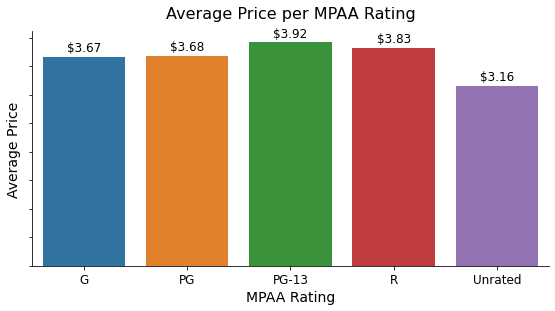

In [61]:
plot = sns.catplot(x="MPAA_Rating", y="Avg_Price", data=avg_price_mpaa_rating, kind="bar", height=4, aspect=2)
ax = plot.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05, f'${p.get_height():.2f}', 
            ha='center', va='bottom', fontsize=12)
plt.title("Average Price per MPAA Rating", fontsize=16, y=1.03)
plt.xlabel("MPAA Rating", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(fontsize=12)
ax.yaxis.set_ticklabels([])
plt.show()

In [62]:
avg_price_rating = data.groupby("Movie_Rating").agg({"Price":"mean", "Title":"count"}).reset_index()
avg_price_rating.columns = ["Movie_Rating", "Avg_Price", "Movie_Count"]
avg_price_rating["Avg_Price"] = avg_price_rating["Avg_Price"].round(2)
avg_price_rating

,Movie_Rating,Avg_Price,Movie_Count
0,4.0,3.15,136
1,4.1,3.37,120
2,4.2,3.53,136
3,4.3,3.65,171
4,4.4,3.68,183
5,4.5,3.79,220
6,4.6,3.80,288
7,4.7,3.72,298
8,4.8,3.64,198
9,4.9,3.54,20


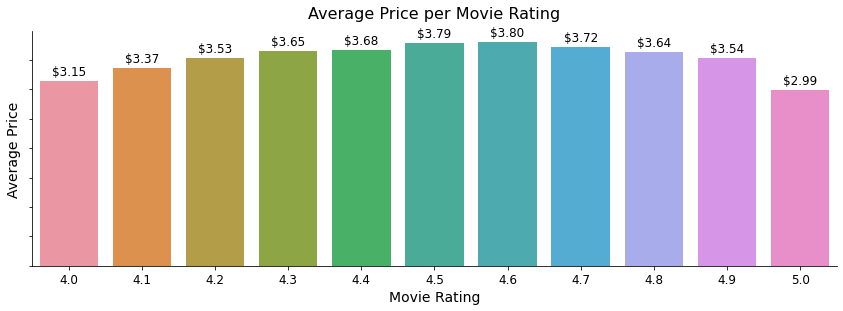

In [63]:
plot = sns.catplot(x="Movie_Rating", y="Avg_Price", data=avg_price_rating, kind="bar", height=4, aspect=3)
ax = plot.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.05, f'${p.get_height():.2f}', 
            ha='center', va='bottom', fontsize=12)
plt.title("Average Price per Movie Rating", fontsize=16, y=1.03)
plt.xlabel("Movie Rating", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.xticks(fontsize=12)
ax.yaxis.set_ticklabels([])
plt.show()

#### Price correlation with movie rating and MPAA rating

In [64]:
corr_coef = round(data["Movie_Rating"].corr(data["Price"]), 4)
print(f"Linear correlation between movie rating and price is {corr_coef*100}%")

Linear correlation between movie rating and price is 11.67%


In [86]:
corr_coef2 = round(data["No_Of_Ratings"].corr(data["Price"]), 4)
print(f"Linear correlation between number of ratings and price is {corr_coef2*100}%")

Linear correlation between number of ratings and price is 12.82%


#### Average price - summary

- The average price is USD 3.66 (minimum -  USD 0.89, maximum - USD 5.99).
- The average price by release year mostly ranges between USD 3 and USD 4, however, movies released in 2023 have much higher price - USD 4.83 (the highest of any release years).
- The price amplitude (difference between the minimum and maximum price by release year) is larger for movies released after 2010 compared to older movies
- MPAA rating: PG-13-rated movies have the highest average price (USD 3.92) and Unrated movies - the lowest (USD 3.16)
- The average price is the highest for movies with the rating of 4.5 and 4.6 (USD 3.79 and 3.80, accordingly); the lowest - for those with the rating of 4.0 and 5.0 (USD 3.15 and USD 2.99, accordingly).
- The linear correlation coefficient between price and movie rating is ~ 12%. The linear correlation coefficient between price and the number of ratings is ~ 13%. Both values indicate a weak linear correlation. 

# Conclusions and recommendations

### Conclusions on data quality

There are some issues with data quality identified during the analysis:
1. Initial dataset included collections and bonus/extended editions. Since such items can't be compared with single movies, so additional parameter for classification (new column in the dataset) would be very useful in this regard. 
2. The dataset includes different video formats (X-ray, HDR, UHD, 4K etc.) and in most cases this can be only identified by inspection of the Amazon website. Additional parameter for classification would be also helpful for such cases: movies of higher video quality usually have higher prices, and this can't be directly observed and analyzed from the current version of the dataset.  
3. Release year, director and price are missing in some cases, while they are presented on the movie page on the Amazon website. This is a data parsing issue and should be resolved at the stage of dataset preparation.
4. NaN values in the "MPAA_Rating" in some cases represent Unrated movies, while in others they have an MPAA rating that is not parsed from the Amazon website. This issue should be also fixed.
5. The "Release_Year" column had a float datatype, although it was easily converted to an integer during the analysis.
6. In some cases, information about director was incorrect (not relevant for this particular project, but can be the issue for other purposes).
7. Inconsistent naming: for example, "Totally Killer" (movie title only) and "Guy Ritchie's The Covenant" (movie title and director's name). It is not critical for the current project, but impairs readability and can be the issue if movie titles analysis is needed.
8. There was a duplicate entry identified ("The Gift" movie) that was removed from the analysis.

### Conclusions on data analysis

Key numbers:
- The numbers of movies (after data preprocessing): 1805.
- The average movie rating: 4.48 (range: 4.0-5.0).
- The average movie price: USD 3.66 (range: USD 0.89-5.99).

Key observations:
- The majority of movies have been released after 2000 (77.1% of the total).
- Movies released after 2000 have lower average rating (4.45) compared to older movies (4.59). 
- PG-rated movies have the highest average rating, while PG-13 and R-rated movies have the highest average price.
- Movies released in 2023 have the highest average price (USD 4.83) compared to all other years. 
- There is a weak correlation of price with movie rating or the number of ratings.

Recommendations:
- Consider adjusting pricing strategy: higher prices for movies with higher rating and/or number of reviews (for example, consider higher prices for PG-rated movies and lower prices for R-rated movies).
- Consider the difference in average rating for movies released in recent years compared to older movies, analyse users feedback, adjust movie portfolio if needed.